In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("elantra.csv")
df.tail(10)

,Month,Year,ElantraSales,Unemployment,Queries,CPI_energy,CPI_all
40,10,2012,14512,7.8,257,256.389,231.652
41,10,2013,14876,7.2,223,243.374,233.782
42,11,2010,8631,9.8,161,219.303,219.544
43,11,2011,12414,8.6,255,247.092,227.136
44,11,2012,15923,7.8,246,248.136,231.190
45,11,2013,16751,7.0,231,242.301,234.033
46,12,2010,13096,9.4,170,227.190,220.437
47,12,2011,13025,8.5,253,243.015,227.093
48,12,2012,19024,7.9,275,244.698,231.099
49,12,2013,21692,6.7,279,246.189,234.594


In [2]:
df = df.sort_values(by = ['Year', 'Month'])
df = df.reset_index(drop = True)
df.head(10)


,Month,Year,ElantraSales,Unemployment,Queries,CPI_energy,CPI_all
0,1,2010,7690,9.7,153,213.377,217.466
1,2,2010,7966,9.8,130,209.924,217.251
2,3,2010,8225,9.9,138,209.163,217.305
3,4,2010,9657,9.9,132,209.024,217.376
4,5,2010,9781,9.6,177,206.172,217.299
5,6,2010,14245,9.4,138,204.161,217.285
6,7,2010,18215,9.5,156,206.834,217.677
7,8,2010,15181,9.5,202,208.927,218.012
8,9,2010,10062,9.5,150,209.850,218.281
9,10,2010,9497,9.5,178,216.655,219.024


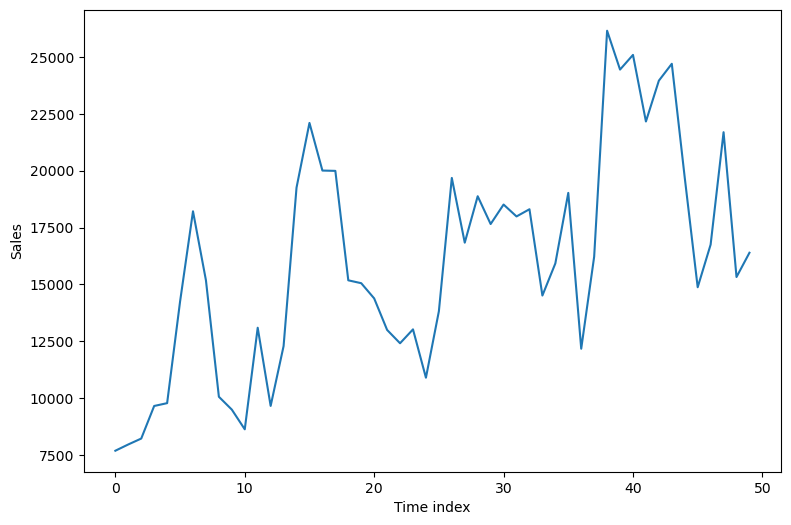

In [3]:
plt.figure(figsize = (9, 6))
plt.plot(df.ElantraSales.values)
plt.xlabel("Time index")
plt.ylabel("Sales")
plt.show()

In [4]:
numeric_feats = df.columns.drop(["ElantraSales", "Month", "Year"])
numeric_feats

Index(['Unemployment', 'Queries', 'CPI_energy', 'CPI_all'], dtype='object')

In [5]:
df_train = df[df.Year < 2013]
df_test = df[df.Year >= 2013]

y_train = df_train.ElantraSales.values
y_test = df_test.ElantraSales.values

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(df_train[numeric_feats])
X_train = sc.transform(df_train[numeric_feats])
X_test = sc.transform(df_test[numeric_feats])

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [7]:
from sklearn.metrics import mean_squared_error

def relative_error(y_true, y_pred):
    errors = np.abs(y_pred - y_true).astype(float) / y_true
    return np.mean(errors) * 100

In [8]:
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('Mean relative errors: {:.1f}%'.format(relative_error(y_test, y_pred)))

RMSE: 5017.35
Mean relative errors: 19.0%


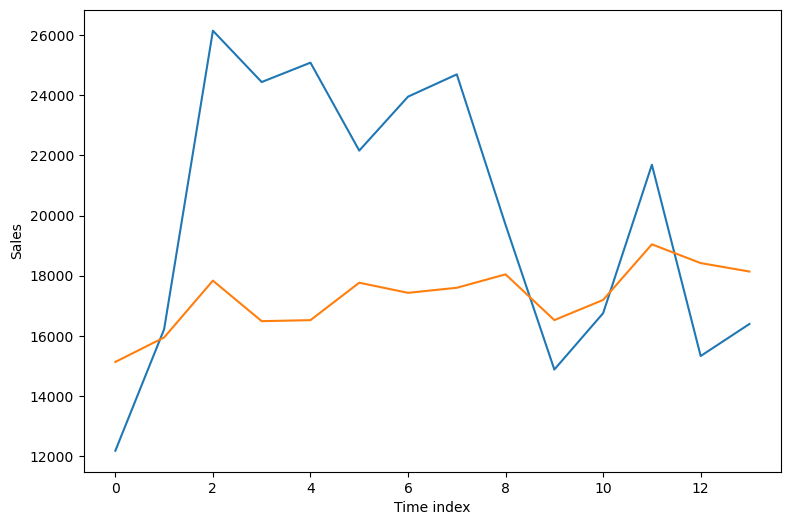

In [9]:
plt.figure(figsize = (9, 6))
plt.plot(y_test)
plt.plot(y_pred)
plt.xlabel("Time index")
plt.ylabel("Sales")
plt.show()

In [10]:
month_onehot_train = pd.get_dummies(df_train.Month, dtype = 'int')
month_onehot_train.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [11]:
X_train = np.hstack((X_train, month_onehot_train))
X_train[0]

array([ 1.24576653, -1.25517995, -1.21438113, -1.35903692,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

In [12]:
month_onehot_test = pd.get_dummies(df_test.Month, dtype = 'int')
X_test = np.hstack((X_test, month_onehot_test))

In [18]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('Mean relative errors: {:.1f}%'.format(relative_error(y_test, y_pred)))

RMSE: 3590.37
Mean relative errors: 12.8%


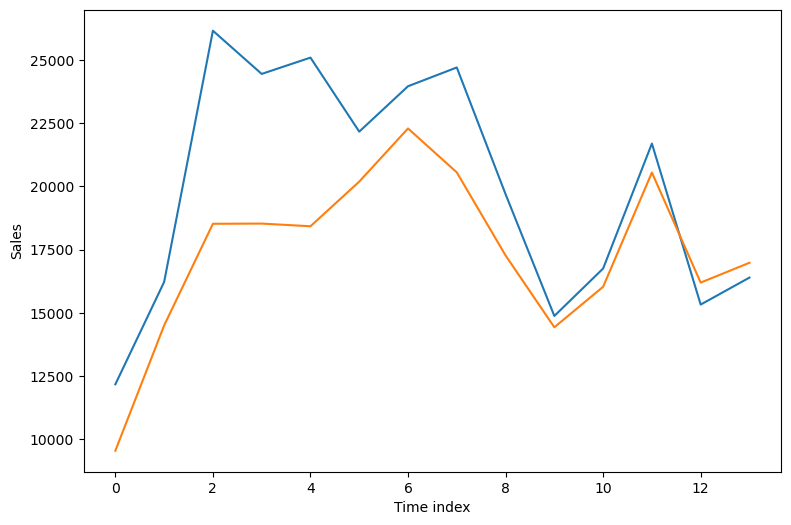

In [20]:
plt.figure(figsize = (9, 6))
plt.plot(y_test)
plt.plot(y_pred)
plt.xlabel("Time index")
plt.ylabel("Sales")
plt.show()